In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import os

import cv2

from glob import glob
from matplotlib.patches import  Polygon
from matplotlib.collections import PatchCollection
from scipy.stats import linregress
from scipy.spatial.distance import cdist


from utils import geometry

In [28]:
data_dir_uf_a='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126\\Data/'
data_dir_uf_b='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20210527_1_uf\\Data/'
data_dir_us='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230203_incremental\\Data/'#

save_dir='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation/'

In [7]:
df_uf_a=pd.read_csv(data_dir_uf_a+'20230126_2_collated.csv')
df_uf_b=pd.read_csv(data_dir_uf_b+'20210527_1_collated.csv')
df_us=pd.read_csv(data_dir_us+'20230203_1_collated.csv')

In [62]:
df_sp=df_uf_b[['time', 'shape_parameter']]
df_sp.time=df_sp.time+300

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_67448\2232243934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp.time=df_sp.time+300


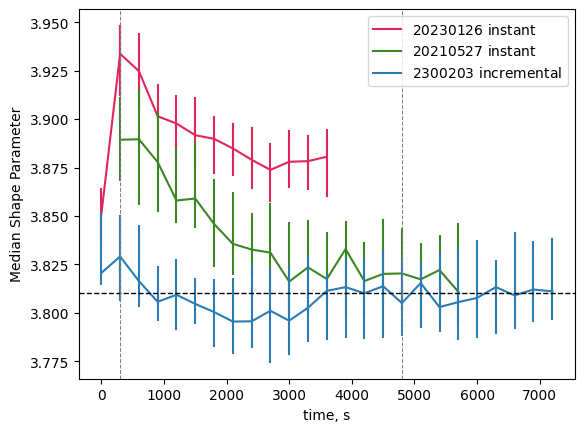

In [63]:

sns.lineplot(data=df_uf_a[df_uf_a.time>0], x='time', y='shape_parameter', estimator=np.median, err_style='bars', color=sns.husl_palette(3,l=.5)[0], errorbar='ci', label="$20230126$ instant")
sns.lineplot(data=df_sp, x='time', y='shape_parameter', estimator=np.median, err_style='bars',color=sns.husl_palette(3,l=.5)[1], errorbar='ci', label="$20210527$ instant")
sns.lineplot(data=df_us[df_us.time>0], x='time', y='shape_parameter', estimator=np.median, err_style='bars', color=sns.husl_palette(3,l=.5)[2], errorbar='ci', label="$2300203$ incremental")
sns.lineplot(data=df_uf_a[df_uf_a.time<600], x='time', y='shape_parameter', estimator=np.median, err_style='bars', color=sns.husl_palette(3,l=.5)[0], errorbar='ci')
sns.lineplot(data=df_us[df_us.time<600], x='time', y='shape_parameter', estimator=np.median, err_style='bars', color=sns.husl_palette(3,l=.5)[2], errorbar='ci')
plt.axhline(3.81, color='k', linestyle='--', linewidth=1)
plt.axvline(300, color='grey', linestyle='--', linewidth=0.75 )
plt.axvline(4800, color='grey', linestyle='--' , linewidth=0.75)
plt.legend()
plt.ylabel('Median Shape Parameter')
plt.xlabel('time, s')
plt.savefig(save_dir+'/shape_parameter_comp.png', dpi=300, bbox_inches='tight')

In [31]:
areas_time_uf_a=df_uf_a.pivot(index='cell_id', columns='time', values='cell_area_microns')
areas_time_uf_b=df_uf_b.pivot(index='cell_id', columns='time', values='cell_area_microns')
areas_time_us=df_us.pivot(index='cell_id', columns='time', values='cell_area_microns')
#area_norm_uf_a=areas_time.div(areas_time[0], axis=0)

In [54]:
area_norm_us=areas_time_us.div(areas_time_us[4800], axis=0).iloc[:, 16:].melt()
area_norm_us.time=area_norm_us.time-4800
area_norm_uf_b=areas_time_uf_b.div(areas_time_uf_b[0], axis=0).melt()
area_norm_uf_a=areas_time_uf_a.div(areas_time_uf_a[300], axis=0).iloc[:, 1:].melt()
area_norm_uf_a.time=area_norm_uf_a.time-300

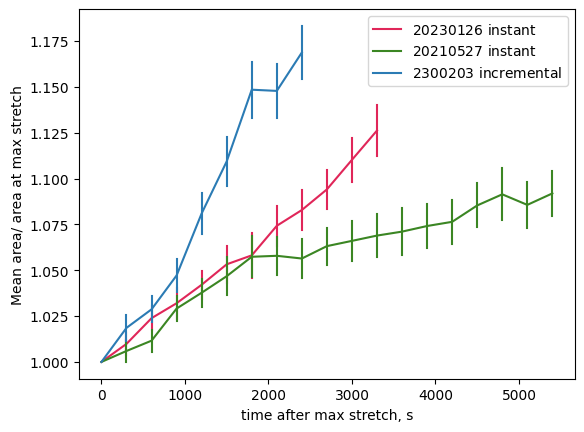

In [80]:

sns.lineplot(data=area_norm_uf_a, x='time', y='value', estimator=np.mean, err_style='bars', color=sns.husl_palette(3,l=.5)[0], errorbar='se', label="$20230126$ instant")
sns.lineplot(data=area_norm_uf_b, x='time', y='value', estimator=np.mean, err_style='bars',color=sns.husl_palette(3,l=.5)[1], errorbar='se', label="$20210527$ instant")
sns.lineplot(data=area_norm_us, x='time', y='value', estimator=np.mean, err_style='bars', color=sns.husl_palette(3,l=.5)[2], errorbar='se', label="$2300203$ incremental")
plt.legend()
plt.ylabel('Mean area/ area at max stretch')
plt.xlabel('time after max stretch, s')
plt.savefig(save_dir+'/area_norm_max_stretch_comp.png', dpi=300, bbox_inches='tight')

In [81]:
L_time_uf_a=df_uf_a.pivot(index='cell_id', columns='time', values='cell_perimeter_microns')
L_time_uf_b=df_uf_b.pivot(index='cell_id', columns='time', values='cell_perimeter_microns')
L_time_us=df_us.pivot(index='cell_id', columns='time', values='cell_perimeter_microns')

L_norm_us=L_time_us.div(L_time_us[4800], axis=0).iloc[:, 16:].melt()
L_norm_us.time=L_norm_us.time-4800
L_norm_uf_b=L_time_uf_b.div(L_time_uf_b[0], axis=0).melt()
L_norm_uf_a=L_time_uf_a.div(L_time_uf_a[300], axis=0).iloc[:, 1:].melt()
L_norm_uf_a.time=L_norm_uf_a.time-300



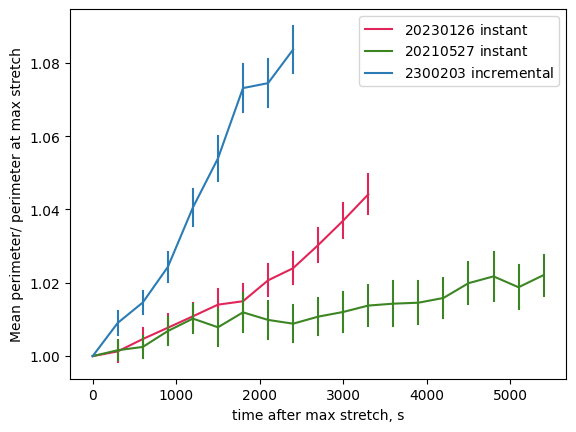

In [82]:
sns.lineplot(data=L_norm_uf_a, x='time', y='value', estimator=np.mean, err_style='bars', color=sns.husl_palette(3,l=.5)[0], errorbar='se', label="$20230126$ instant")
sns.lineplot(data=L_norm_uf_b, x='time', y='value', estimator=np.mean, err_style='bars',color=sns.husl_palette(3,l=.5)[1], errorbar='se', label="$20210527$ instant")
sns.lineplot(data=L_norm_us, x='time', y='value', estimator=np.mean, err_style='bars', color=sns.husl_palette(3,l=.5)[2], errorbar='se', label="$2300203$ incremental")
plt.legend()
plt.ylabel('Mean perimeter/ perimeter at max stretch')
plt.xlabel('time after max stretch, s')
plt.savefig(save_dir+'/perimeter_norm_max_stretch_comp.png', dpi=300, bbox_inches='tight')

In [76]:
df_uf_b_circ=df_uf_b[['time', 'circularity']]
df_uf_b_circ.time=df_uf_b_circ.time+300

df_uf_b_hang=df_uf_b[['time', 'angle_horizontal']]
df_uf_b_hang.time=df_uf_b_hang.time+300

df_uf_b_circ

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_67448\2891750597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uf_b_circ.time=df_uf_b_circ.time+300
C:\Users\v35431nc\AppData\Local\Temp\ipykernel_67448\2891750597.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uf_b_hang.time=df_uf_b_hang.time+300


,time,circularity
0,300,0.730091
1,300,0.394320
2,300,0.297691
3,300,0.365678
4,300,0.382484
...,...,...
1230,5700,0.279325
1231,5700,0.438851
1232,5700,0.405918
1233,5700,0.301231


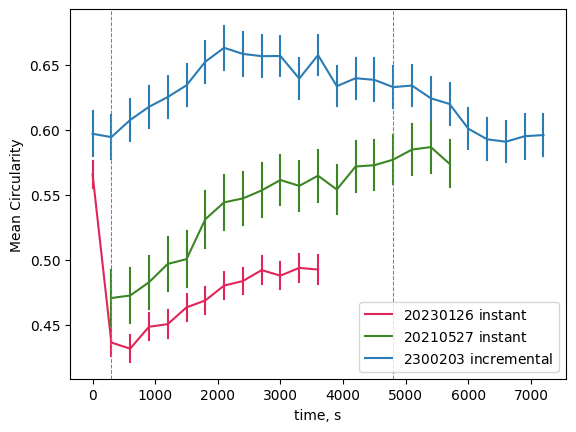

In [78]:

sns.lineplot(data=df_uf_a, x='time', y='circularity', estimator=np.mean, err_style='bars', color=sns.husl_palette(3,l=.5)[0], errorbar='se', label="$20230126$ instant")
sns.lineplot(data=df_uf_b_circ, x='time', y='circularity', estimator=np.mean, err_style='bars',color=sns.husl_palette(3,l=.5)[1], errorbar='se', label="$20210527$ instant")
sns.lineplot(data=df_us, x='time', y='circularity', estimator=np.mean, err_style='bars', color=sns.husl_palette(3,l=.5)[2], errorbar='se', label="$2300203$ incremental")
#plt.axhline(3.81, color='k', linestyle='--', linewidth=1)
plt.axvline(300, color='grey', linestyle='--', linewidth=0.75 )
plt.axvline(4800, color='grey', linestyle='--' , linewidth=0.75)
plt.legend()
plt.ylabel('Mean Circularity')
plt.xlabel('time, s')
plt.savefig(save_dir+'/circularity_comp.png', dpi=300, bbox_inches='tight')

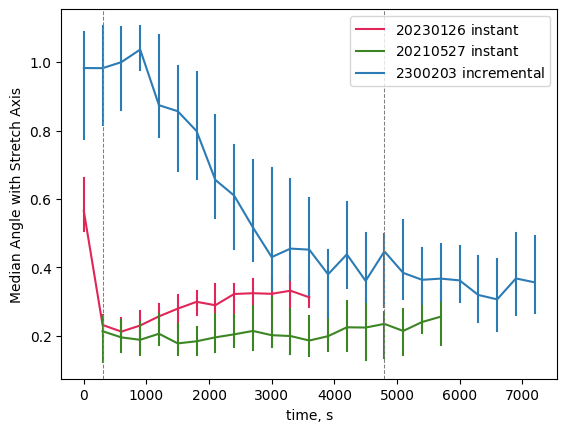

In [77]:
sns.lineplot(data=df_uf_a, x='time', y='angle_horizontal', estimator=np.median, err_style='bars', color=sns.husl_palette(3,l=.5)[0], errorbar='ci', label="$20230126$ instant")
sns.lineplot(data=df_uf_b_hang, x='time', y='angle_horizontal', estimator=np.median, err_style='bars',color=sns.husl_palette(3,l=.5)[1], errorbar='ci', label="$20210527$ instant")
sns.lineplot(data=df_us, x='time', y='angle_horizontal', estimator=np.median, err_style='bars', color=sns.husl_palette(3,l=.5)[2], errorbar='ci', label="$2300203$ incremental")
#plt.axhline(3.81, color='k', linestyle='--', linewidth=1)
plt.axvline(300, color='grey', linestyle='--', linewidth=0.75 )
plt.axvline(4800, color='grey', linestyle='--' , linewidth=0.75)
plt.legend()
plt.ylabel('Median Angle with Stretch Axis')
plt.xlabel('time, s')
plt.savefig(save_dir+'/h_angle_comp.png', dpi=300, bbox_inches='tight')

In [83]:
np.pi/4

0.7853981633974483